## Youtube Data Loading and Preparing

In [4]:
import json
import pandas as pd

with open("watch-history.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to records
records = []
for item in data:
    if "title" in item and "time" in item:
        records.append({
            "title": item.get("title"),
            "video_url": item.get("titleUrl"),
            "channel": item.get("subtitles", [{}])[0].get("name"),
            "channel_url": item.get("subtitles", [{}])[0].get("url"),
            "watched_at": pd.to_datetime(item.get("time")),
            "platform": ", ".join(item.get("products", []))
        })

df = pd.DataFrame(records)

# Extract time-based features
df["date"] = df["watched_at"].dt.date
df["hour"] = df["watched_at"].dt.hour
df["month"] = df["watched_at"].dt.to_period("M")
df["year"] = df["watched_at"].dt.year
df["weekday"] = df["watched_at"].dt.day_name()

df.head()

C:\Users\akank\AppData\Local\Temp\ipykernel_19916\962196345.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["watched_at"].dt.to_period("M")


,title,video_url,channel,channel_url,watched_at,platform,date,hour,month,year,weekday
0,Watched Archana Ji's Mom Reaction will Melt yo...,https://www.youtube.com/watch?v=wpU2BXMglgM,Yaary Moments,https://www.youtube.com/channel/UCnTffPILf8kdj...,2025-08-24 00:53:58.085000+00:00,YouTube,2025-08-24,0,2025-08,2025,Sunday
1,Watched The glass was fighting for its life #v...,https://www.youtube.com/watch?v=zGhrItxboe4,nikkimomo :3,https://www.youtube.com/channel/UC1w8lzWLmXKdx...,2025-08-24 00:53:28.728000+00:00,YouTube,2025-08-24,0,2025-08,2025,Sunday
2,Watched Dharmesh Joins Iamonlang for Afro Danc...,https://www.youtube.com/watch?v=Gw8Kaw4tozE,Amazon MX Player,https://www.youtube.com/channel/UC1NtcHxG3wiyh...,2025-08-24 00:52:13.723000+00:00,YouTube,2025-08-24,0,2025-08,2025,Sunday
3,Watched Shruti Haasan Accidentally Calls Rashm...,https://www.youtube.com/watch?v=iRQSL_g4i5w,Mashable India,https://www.youtube.com/channel/UCXSWwwSYaBxhm...,2025-08-24 00:51:34.289000+00:00,YouTube,2025-08-24,0,2025-08,2025,Sunday
4,Watched The Otter Who Tried Too Hard 😂🦦 (📷 @u...,https://www.youtube.com/watch?v=A4nu5cSnfFg,Infi's Diary,https://www.youtube.com/channel/UCmLthSK3e2WWT...,2025-08-24 00:51:31.618000+00:00,YouTube,2025-08-24,0,2025-08,2025,Sunday


## Set the Color Theme for the Charts and Graphs

In [10]:
import matplotlib.pyplot as plt

def styled_bar_chart(data, title, xlabel="", ylabel="", rotation=45, color="#b92e34"):
    plt.figure(figsize=(12, 6))
    bars = data.plot(
        kind="bar",
        color=color,
        edgecolor="black"
    )
    
    # YouTube Style
    plt.title(title, fontsize=18, fontweight="bold", color="#282828")
    plt.xlabel(xlabel, fontsize=14, fontweight="semibold")
    plt.ylabel(ylabel, fontsize=14, fontweight="semibold")
    plt.xticks(rotation=rotation, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    
    # Remove spines
    for spine in ["top", "right"]:
        plt.gca().spines[spine].set_visible(False)
    
    # Add value labels
    for i, v in enumerate(data):
        plt.text(i, v + max(data)*0.01, f"{v:,}", ha="center", fontsize=11, fontweight="medium")
    
    plt.tight_layout()
    plt.show()


## Data Analysis

#### Most Watched Creators On Youtube

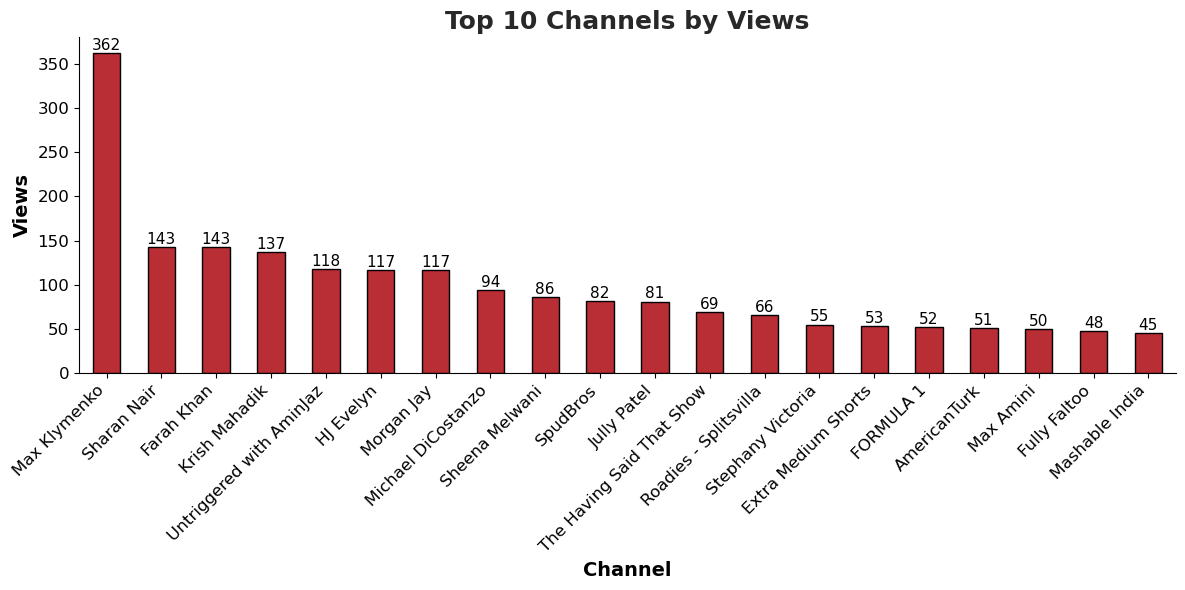

In [26]:
top_channels = df["channel"].value_counts().head(20)
styled_bar_chart(top_channels, "Top 10 Channels by Views", xlabel="Channel", ylabel="Views")

#### Monthly Watching Trends

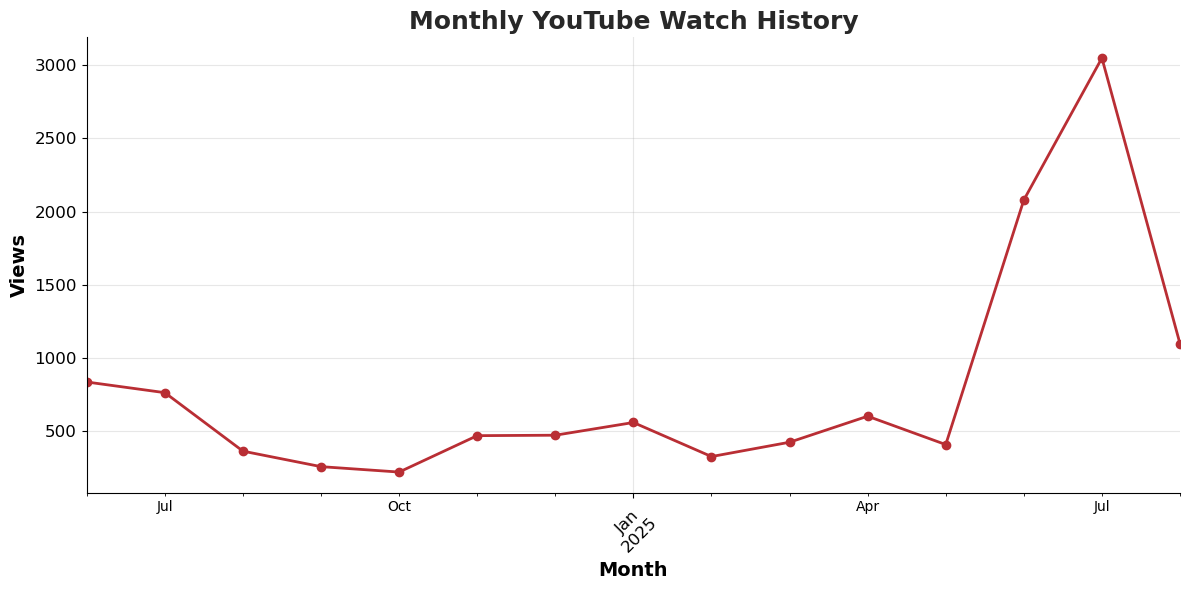

In [28]:
monthly_counts = df.groupby("month").size()
plt.figure(figsize=(12,6))
monthly_counts.plot(kind="line", marker="o", color="#b92e34", linewidth=2)

# Style
plt.title("Monthly YouTube Watch History", fontsize=18, fontweight="bold", color="#282828")
plt.xlabel("Month", fontsize=14, fontweight="semibold")
plt.ylabel("Views", fontsize=14, fontweight="semibold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Hourly Watch Pattern

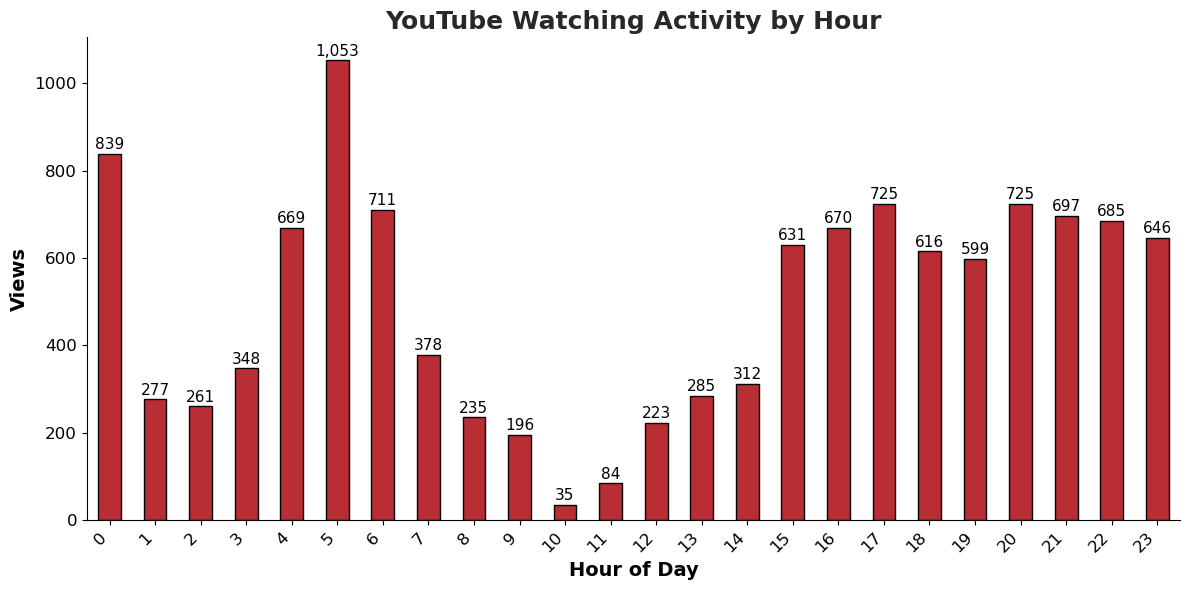

In [14]:
hourly_counts = df.groupby("hour").size()
styled_bar_chart(hourly_counts, "YouTube Watching Activity by Hour", xlabel="Hour of Day", ylabel="Views")

#### Most Watched Days of the Week

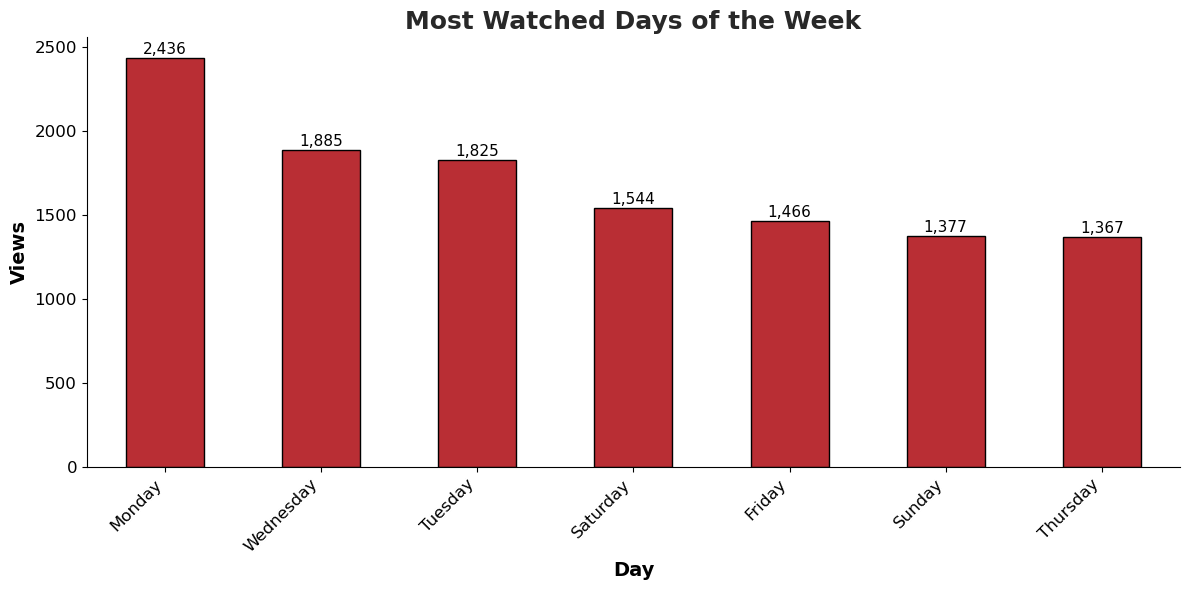

In [15]:
weekday_counts = df["weekday"].value_counts()
styled_bar_chart(weekday_counts, "Most Watched Days of the Week", xlabel="Day", ylabel="Views")

#### Yearly Watch Trends

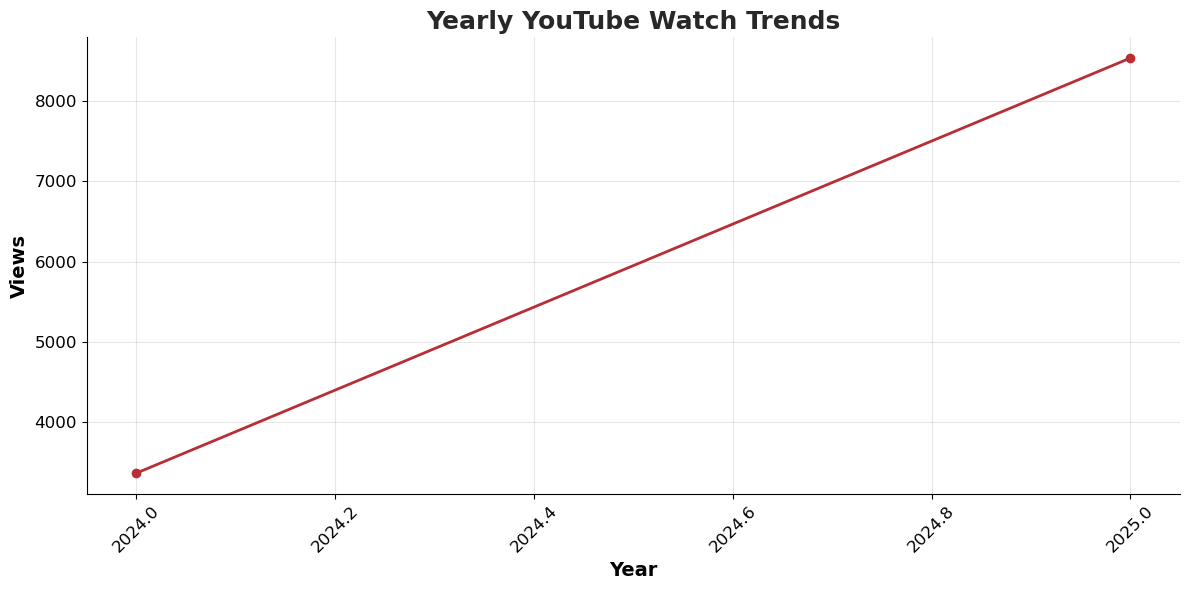

In [17]:
yearly_counts = df.groupby("year").size()
plt.figure(figsize=(12,6))
yearly_counts.plot(kind="line", marker="o", color="#b92e34", linewidth=2)

plt.title("Yearly YouTube Watch Trends", fontsize=18, fontweight="bold", color="#282828")
plt.xlabel("Year", fontsize=14, fontweight="semibold")
plt.ylabel("Views", fontsize=14, fontweight="semibold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Heatmap: Watch Activity by Day & Hour

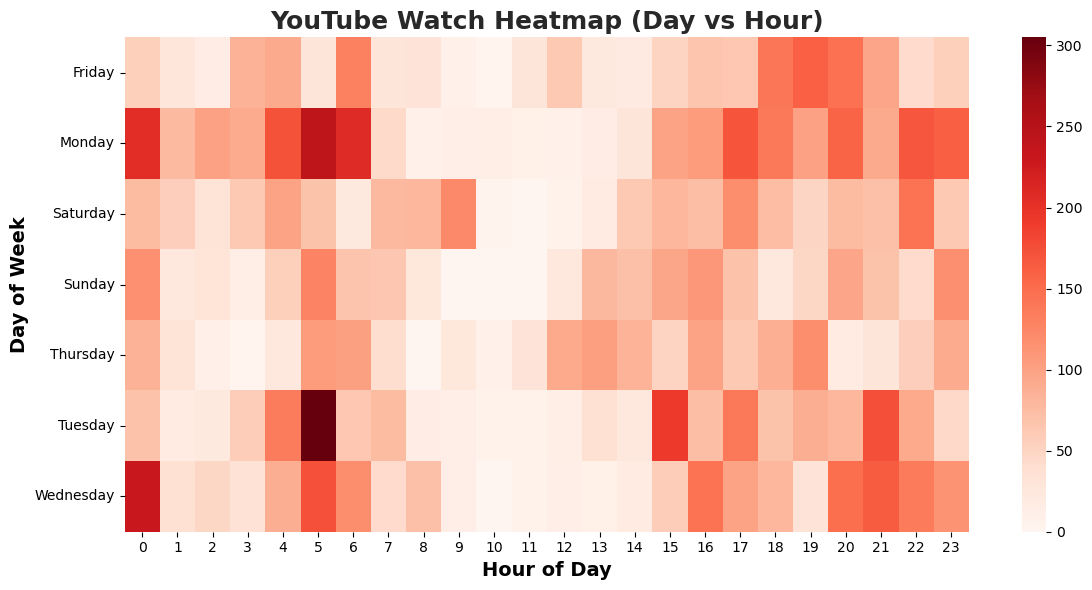

In [18]:
import seaborn as sns

heatmap_data = df.groupby(["weekday", "hour"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=False, cbar=True)
plt.title("YouTube Watch Heatmap (Day vs Hour)", fontsize=18, fontweight="bold", color="#282828")
plt.xlabel("Hour of Day", fontsize=14, fontweight="semibold")
plt.ylabel("Day of Week", fontsize=14, fontweight="semibold")
plt.tight_layout()
plt.show()

#### Longest Binge-Watching Day

In [20]:
daily_counts = df.groupby("date").size()
longest_day = daily_counts.idxmax()
print(f"🔥 Your biggest binge day was {longest_day} with {daily_counts.max()} videos!")

🔥 Your biggest binge day was 2025-07-14 with 283 videos!


#### Top Creator on Longest Day

In [25]:
# Find longest binge day
daily_counts = df.groupby("date").size()
longest_day = daily_counts.idxmax()

# Filter for that day
longest_day_data = df[df["date"] == longest_day]

# Count creators
creator_counts = longest_day_data["channel"].value_counts()

# Find the max watch count
max_watches = creator_counts.max()

# Filter all creators with that max count
top_creators = creator_counts[creator_counts == max_watches]

print(f"🔥 On your biggest binge day ({longest_day}), these were your top creators:")
for creator, count in top_creators.items():
    print(f"  - {creator}: {count} videos")

🔥 On your biggest binge day (2025-07-14), these were your top creators:
  - Jojo Sim: 6 videos
  - HJ Evelyn: 6 videos


#### Binge Sessions (Videos Watched <30 Mins Apart)

In [21]:
df = df.sort_values("watched_at")
df["time_diff"] = df["watched_at"].diff().dt.total_seconds().div(60)
binge_sessions = df[df["time_diff"] < 30].shape[0]
print(f"🔥 You had {binge_sessions} binge sessions (videos <30 mins apart).")

🔥 You had 10569 binge sessions (videos <30 mins apart).


## Key Insights

Most Watched Creators: Identified my top 10 creators, providing a snapshot of recurring content interests.

Monthly & Yearly Trends: Showed spikes and dips in YouTube engagement, reflecting lifestyle or seasonal changes.

Daily & Hourly Patterns: Confirmed peak viewing hours and preferred days of the week for watching content.

Heatmap Visualization: Offered an at-a-glance overview of engagement intensity by day and hour.

Longest Binge Day: On 2025-07-14, I watched 283 videos, with creators Jojo Sim and HJ Evelyn topping that day.

Binge Behavior: Logged 10,569 binge transitions, showing a high frequency of rapid video-to-video consumption.